# 4. Evaluatiing a machine learning
3 ways to evaluate Scikit-learn model/estimators
1. Estimator `score` method
1. The `scoring` parameter
1. `Problem-specific` function

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_desease = pd.read_csv("./csv/heart-disease.csv")

In [3]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Mkae the data
x = heart_desease.drop("target", axis=1)
y = heart_desease['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

### 4.1 Evaluating a model with the score method

In [4]:
clf.score(X_test, Y_test)

0.8524590163934426

Let's do with regression problems

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df["target"] = pd.Series(boston['target'])
boston_df.head()
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop('target', axis=1)
y = boston_df['target']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=.2)

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [7]:
rf.score(X_test, Y_test)

0.8654448653350507

### 4.2 Evaluation model using the `scoring` parameter

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Mkae the data
x = heart_desease.drop("target", axis=1)
y = heart_desease['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [9]:
clf.score(X_test, Y_test)

0.8524590163934426

In [10]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
3. Classification reprot

**1. Accuracy**

In [11]:
# scoring parameter set to None by default, which is mean accuracy

print(f"Heart disease classiffier accuracy: {np.mean(cross_val_score(clf, x, y, cv=5, scoring=None))}")

Heart disease classiffier accuracy: 0.8183606557377049


**2. Area under ROC curvve** : area under receiver operating charateristic curve (AUC/ROC)

- Area under curve (AUC)
- ROC Curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a model false positive rate (FPR)

In [12]:
from sklearn.metrics import roc_curve

# Make prediction with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [13]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [14]:
# calc fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)

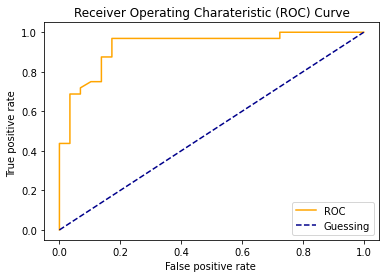

In [15]:
# Create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curse(fpr, tpr):
    """
        Plots a roc curve given the false positive rate
        and true positive rate
    """
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    plt.xlabel("False positive rate ")
    plt.ylabel("True positive rate ")
    plt.title('Receiver Operating Charateristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curse(fpr, tpr)

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_probs_positive)

0.9304956896551724

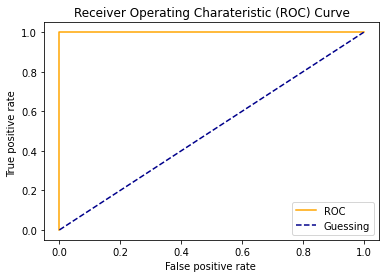

In [17]:
# Plot perfect ROC Curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curse(fpr, tpr)

In [18]:
roc_auc_score(Y_test, Y_test)

1.0

**3. Confusion matrix**

a quick way to compare labels a model predicts and actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confuse

In [21]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [22]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test, y_preds, rownames=['Actual label'], colnames=['Predictd label'])

Predictd label,0,1
Actual label,,
0,24,5
1,4,28


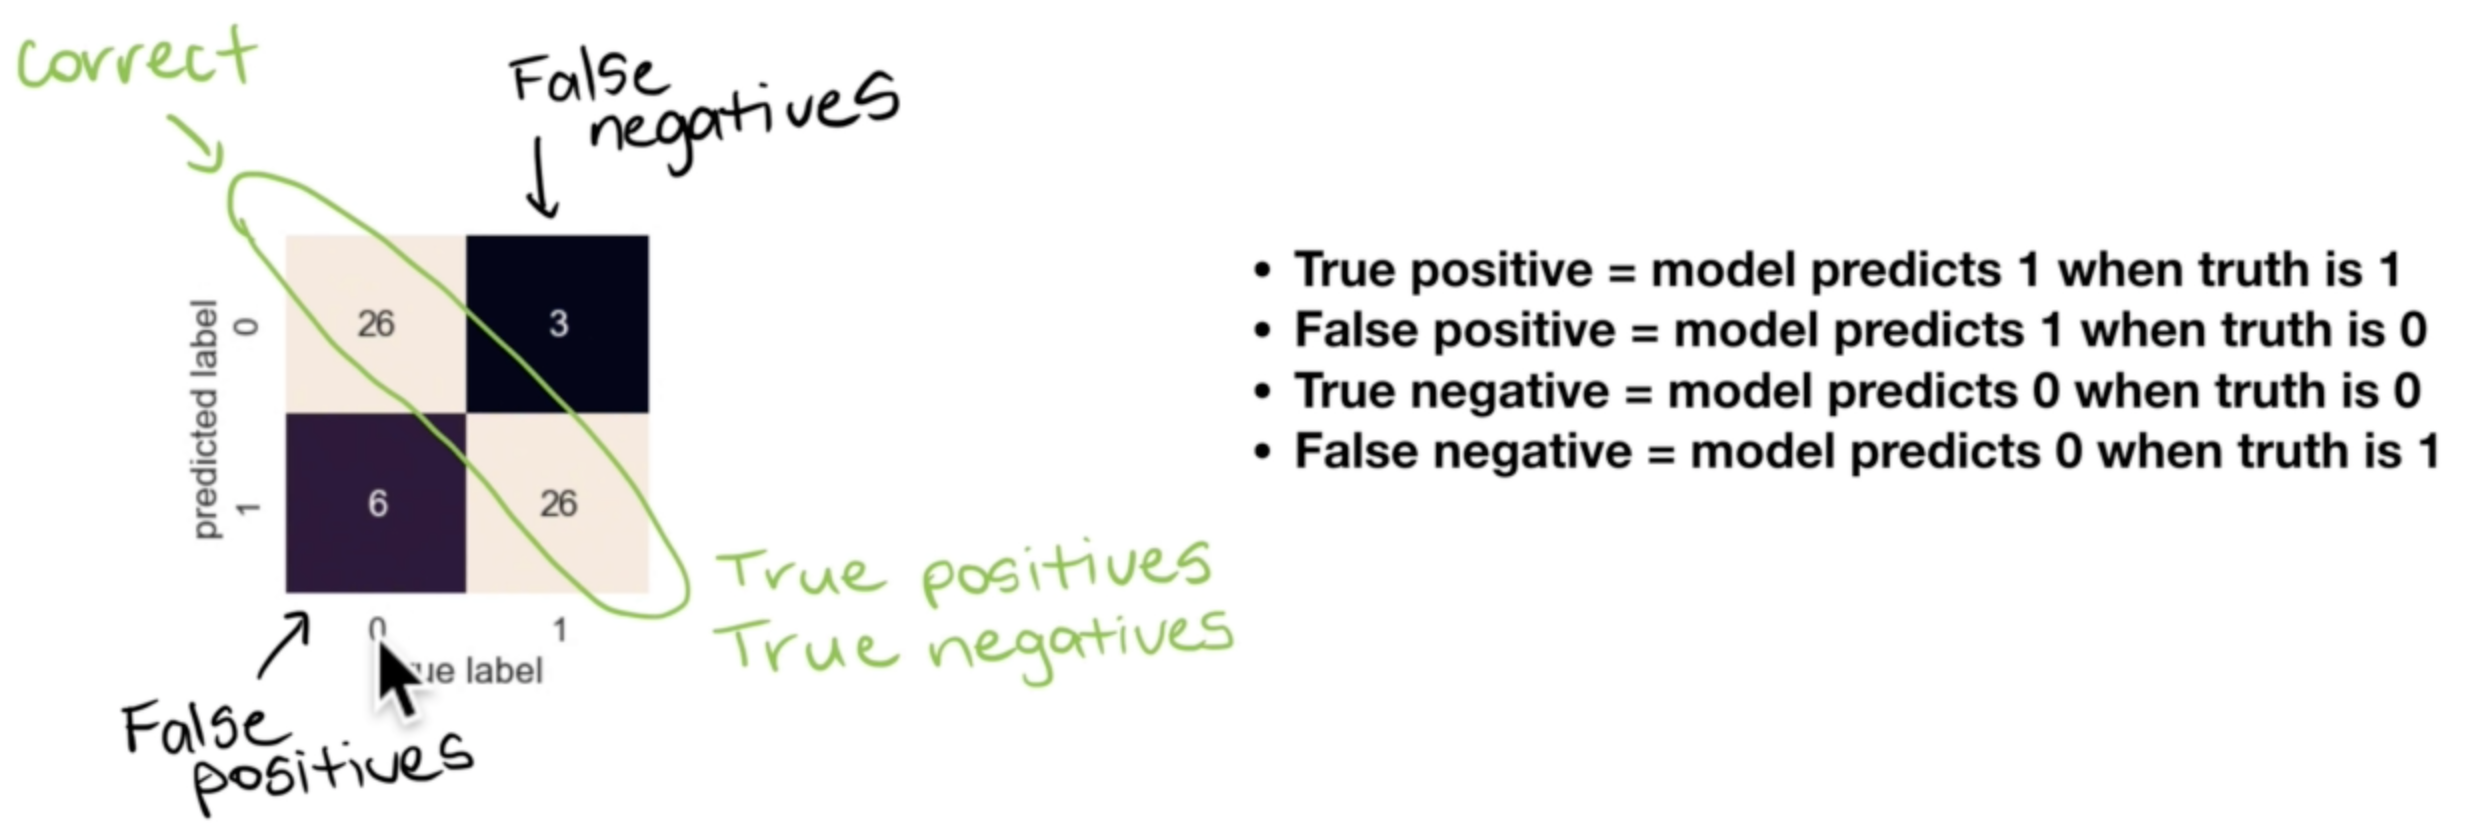

<AxesSubplot:>

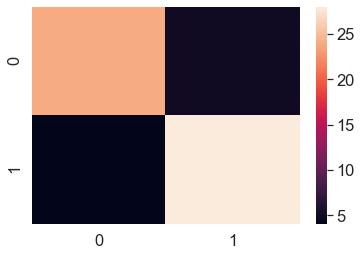

In [23]:
# Make our confusion matrix with seaborn heatmap
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(Y_test, y_preds)
sns.heatmap(conf_mat)

**Install module in system**

import sys

!conda install --yes --prefix (sys.prefix) seanborn

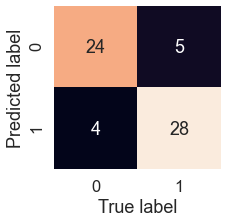

In [26]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf info
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    # Fix broken annotation 3.1.1
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + .5, top-.5)
plot_conf_mat(conf_mat)

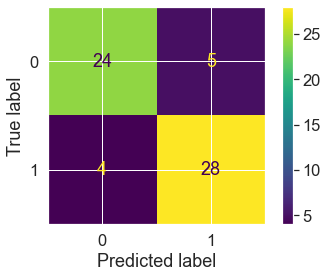

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test)

**Classification report**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

